In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler , OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from utils import OutliersDetector,SqrtTransformer ,LogTransformer,CategTransformer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score , cross_val_predict,cross_validate


In [2]:
df= pd.read_csv("data/train.csv",index_col="Id")
df_test = pd.read_csv("data/test.csv",index_col="Id")

In [3]:
df.columns

Index(['Home Ownership', 'Annual Income', 'Years in current job', 'Tax Liens',
       'Number of Open Accounts', 'Years of Credit History',
       'Maximum Open Credit', 'Number of Credit Problems',
       'Months since last delinquent', 'Bankruptcies', 'Purpose', 'Term',
       'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt',
       'Credit Score', 'Credit Default'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Current 

In [4]:
num_cols1=df.drop(columns=["Monthly Debt", "Years of Credit History"
                           ,"Current Credit Balance","Annual Income"]).select_dtypes(include="float64").columns
num_cols2=["Annual Income"]
num_cols3=["Monthly Debt", "Years of Credit History","Current Credit Balance"]

cat_cols1 = df.drop(columns="Years in current job").select_dtypes(include="object").columns
cat_cols2 = ["Years in current job"]

num_pipeline1 = Pipeline([
    ("outliers_detection" ,OutliersDetector() ),
    ("imputer",SimpleImputer(strategy="median")) ,
    ("scaler",StandardScaler())
])
num_pipeline2 = Pipeline([
    ("outliers_detection" ,OutliersDetector() ),
    ("log_transf",LogTransformer()),
    ("imputer",SimpleImputer(strategy="median")) ,
    ("scaler",StandardScaler())
])
num_pipeline3 = Pipeline([
    ("outliers_detection" ,OutliersDetector() ),
    ("log_transf",SqrtTransformer()),
    ("imputer",SimpleImputer(strategy="median")) ,
    ("scaler",StandardScaler())
])

cat_pipeline1 = Pipeline([
    ("imputer",SimpleImputer(strategy="most_frequent")),
    ("onehot",OneHotEncoder())
])
cat_pipeline2 = Pipeline([
    ("imputer",SimpleImputer(strategy="most_frequent")),
    ("categTransf",OrdinalEncoder())
])

full_pipeline = ColumnTransformer([
    ("num1" , num_pipeline1 , num_cols1 ),
    ("num2", num_pipeline2 , num_cols2 ),
    ("num3",num_pipeline3,num_cols3),
    ("cat1",cat_pipeline1,cat_cols1),
    ("cat2",cat_pipeline2 , cat_cols2)
])



In [5]:
X= full_pipeline.fit_transform(df.drop(columns="Credit Default"))
y=df["Credit Default"]

In [6]:
cols_finales = full_pipeline.get_feature_names_out()
print(cols_finales)

['num1__Tax Liens' 'num1__Number of Open Accounts'
 'num1__Maximum Open Credit' 'num1__Number of Credit Problems'
 'num1__Months since last delinquent' 'num1__Bankruptcies'
 'num1__Current Loan Amount' 'num1__Credit Score' 'num2__Annual Income'
 'num3__Monthly Debt' 'num3__Years of Credit History'
 'num3__Current Credit Balance' 'cat1__Home Ownership_Have Mortgage'
 'cat1__Home Ownership_Home Mortgage' 'cat1__Home Ownership_Own Home'
 'cat1__Home Ownership_Rent' 'cat1__Purpose_business loan'
 'cat1__Purpose_buy a car' 'cat1__Purpose_buy house'
 'cat1__Purpose_debt consolidation' 'cat1__Purpose_educational expenses'
 'cat1__Purpose_home improvements' 'cat1__Purpose_major purchase'
 'cat1__Purpose_medical bills' 'cat1__Purpose_moving'
 'cat1__Purpose_other' 'cat1__Purpose_renewable energy'
 'cat1__Purpose_small business' 'cat1__Purpose_take a trip'
 'cat1__Purpose_vacation' 'cat1__Purpose_wedding' 'cat1__Term_Long Term'
 'cat1__Term_Short Term' 'cat2__Years in current job']


In [ ]:
model_rfc = RandomForestClassifier(n_estimators=1000,max_depth=100 ,random_state=42,n_jobs=4)
scores = cross_validate(model_rfc , X,y,cv=10,scoring=["accuracy","recall","precision","f1"])
scores

{'fit_time': array([4.89646316, 4.87304735, 4.93070388, 4.82932615, 4.88529658,
        4.85261154, 5.34317255, 6.63278103, 6.66279054, 6.64869142]),
 'score_time': array([0.2267046 , 0.21570635, 0.22603559, 0.21283984, 0.22491908,
        0.22443986, 0.32059836, 0.32464981, 0.32214189, 0.31790471]),
 'test_accuracy': array([0.74933333, 0.752     , 0.76133333, 0.728     , 0.76533333,
        0.74      , 0.75466667, 0.76266667, 0.75466667, 0.724     ]),
 'test_recall': array([0.2464455 , 0.23222749, 0.24170616, 0.18009479, 0.27014218,
        0.24170616, 0.24170616, 0.27830189, 0.24056604, 0.19811321]),
 'test_precision': array([0.64197531, 0.67123288, 0.72857143, 0.55072464, 0.72151899,
        0.59302326, 0.68      , 0.70238095, 0.68918919, 0.53164557]),
 'test_f1': array([0.35616438, 0.34507042, 0.36298932, 0.27142857, 0.39310345,
        0.34343434, 0.35664336, 0.39864865, 0.35664336, 0.28865979])}

In [28]:
df["Credit Default"].value_counts(normalize=True)

Credit Default
0    0.718267
1    0.281733
Name: proportion, dtype: float64

In [ ]:
model_rfc = RandomForestClassifier(n_estimators=1000,max_depth=100 ,random_state=42,n_jobs=4, class_weight="balanced")
scores = cross_validate(model_rfc , X,y,cv=10,scoring=["accuracy","recall","precision","f1"])
scores

{'fit_time': array([5.03664565, 4.86856914, 4.92555428, 5.04636383, 5.10504961,
        5.66578579, 6.76535392, 6.7304225 , 6.66453552, 6.66179156]),
 'score_time': array([0.22576523, 0.22745752, 0.25021052, 0.2283411 , 0.23970103,
        0.33281898, 0.33094049, 0.32581425, 0.3280139 , 0.31768966]),
 'test_accuracy': array([0.74      , 0.74533333, 0.748     , 0.728     , 0.74266667,
        0.73866667, 0.744     , 0.748     , 0.74533333, 0.72666667]),
 'test_recall': array([0.20853081, 0.20379147, 0.20379147, 0.16113744, 0.21327014,
        0.21327014, 0.19905213, 0.20754717, 0.20283019, 0.1745283 ]),
 'test_precision': array([0.61111111, 0.65151515, 0.671875  , 0.55737705, 0.625     ,
        0.6       , 0.64615385, 0.67692308, 0.66153846, 0.55223881]),
 'test_f1': array([0.31095406, 0.31046931, 0.31272727, 0.25      , 0.3180212 ,
        0.31468531, 0.30434783, 0.31768953, 0.31046931, 0.26523297])}

In [8]:
model_rfc = RandomForestClassifier(n_estimators=1000,max_depth=500 ,random_state=42,n_jobs=4, class_weight="balanced")
scores = cross_validate(model_rfc , X,y,cv=10,scoring=["accuracy","recall","precision","f1"])
scores

{'fit_time': array([5.13616562, 5.8677721 , 6.70854354, 5.75165558, 4.94984484,
        4.88530159, 4.93238354, 4.97758222, 5.05801392, 5.008883  ]),
 'score_time': array([0.22578835, 0.32636857, 0.33294535, 0.22815824, 0.22510982,
        0.2274065 , 0.22663355, 0.2350595 , 0.2363925 , 0.23671365]),
 'test_accuracy': array([0.74      , 0.74533333, 0.748     , 0.728     , 0.74266667,
        0.73866667, 0.744     , 0.748     , 0.74533333, 0.72666667]),
 'test_recall': array([0.20853081, 0.20379147, 0.20379147, 0.16113744, 0.21327014,
        0.21327014, 0.19905213, 0.20754717, 0.20283019, 0.1745283 ]),
 'test_precision': array([0.61111111, 0.65151515, 0.671875  , 0.55737705, 0.625     ,
        0.6       , 0.64615385, 0.67692308, 0.66153846, 0.55223881]),
 'test_f1': array([0.31095406, 0.31046931, 0.31272727, 0.25      , 0.3180212 ,
        0.31468531, 0.30434783, 0.31768953, 0.31046931, 0.26523297])}

In [12]:
random_forest_model = RandomForestClassifier(n_estimators = 1000 , max_depth=500 , random_state=42,class_weight="balanced")
# random_forest_model.fit(X,y)
# y_pred = random_forest_model.predict(X)


In [10]:
y_pred

array([0, 1, 0, ..., 0, 0, 0], shape=(7500,))

In [11]:
from sklearn.metrics import confusion_matrix
confusion_matrix( y , y_pred)

array([[5387,    0],
       [   0, 2113]])

In [13]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, f1_score , recall_score,precision_score , roc_auc_score,roc_curve

y_pred = cross_val_predict(random_forest_model , X,y ,cv=10 )
y_pred_proba = cross_val_predict(random_forest_model , X,y,cv=10 , method="predict_proba" )
y_pred_proba

array([[0.93 , 0.07 ],
       [0.826, 0.174],
       [0.933, 0.067],
       ...,
       [0.913, 0.087],
       [0.721, 0.279],
       [0.611, 0.389]], shape=(7500, 2))

In [14]:
y_pred_proba[:,1]

array([0.07 , 0.174, 0.067, ..., 0.087, 0.279, 0.389], shape=(7500,))

In [15]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(7500,))

In [17]:
from sklearn.metrics import confusion_matrix , f1_score , recall_score , precision_score
confusion_matrix(y , y_pred)

array([[5135,  252],
       [1693,  420]])

In [18]:
recall_score(y , y_pred )

0.19876952200662565

In [19]:
precision_score(y,y_pred)

0.625

In [20]:
pipe = Pipeline([
    ("preprocess",full_pipeline),
    ("model",RandomForestClassifier(n_estimators=1000 , max_depth=50 ,class_weight="balanced",random_state=42,n_jobs=4))
])
scores = cross_validate(pipe , df.drop(columns="Credit Default") ,df["Credit Default"] ,cv=10 ,scoring=["accuracy","recall","precision","f1"])

In [21]:
scores

{'fit_time': array([5.03488755, 5.61258888, 6.72414422, 6.71000433, 6.82548404,
        6.8488338 , 6.92150903, 6.95208478, 7.16391206, 6.93116713]),
 'score_time': array([0.26973176, 0.34885359, 0.35339022, 0.37674522, 0.35174823,
        0.35396767, 0.35354519, 0.35800576, 0.35661745, 0.34111524]),
 'test_accuracy': array([0.736     , 0.752     , 0.74933333, 0.72133333, 0.744     ,
        0.74133333, 0.75066667, 0.75066667, 0.748     , 0.73066667]),
 'test_recall': array([0.19905213, 0.21327014, 0.20379147, 0.13744076, 0.21327014,
        0.21327014, 0.21327014, 0.22169811, 0.20754717, 0.18867925]),
 'test_precision': array([0.5915493 , 0.69230769, 0.68253968, 0.51785714, 0.63380282,
        0.61643836, 0.68181818, 0.68115942, 0.67692308, 0.57142857]),
 'test_f1': array([0.29787234, 0.32608696, 0.31386861, 0.21722846, 0.31914894,
        0.31690141, 0.32490975, 0.33451957, 0.31768953, 0.28368794])}

In [23]:
for k in scores.keys():
    print(f"score_{k} : {np.mean(scores[k])}")

score_fit_time : 6.572461581230163
score_score_time : 0.34637203216552737
score_test_accuracy : 0.7424000000000001
score_test_recall : 0.20112894572118395
score_test_precision : 0.6345824237004642
score_test_f1 : 0.30519135133208375


In [25]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
y_pred_proba = cross_val_predict(pipe , df.drop(columns="Credit Default") , df["Credit Default"] , cv=10 , method="predict_proba")

In [28]:
fpr , tpr,threshold = roc_curve(df["Credit Default"] , y_pred_proba[:,1])


In [31]:
np.arange(0,1.1,0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [ ]:
param_grid = [
    {"n_estimators":[50,100,300,500] , "max_depth":[None, 10,20,50],"min_sample_split":[]}
]

AttributeError: module 'matplotlib.pyplot' has no attribute 'label'

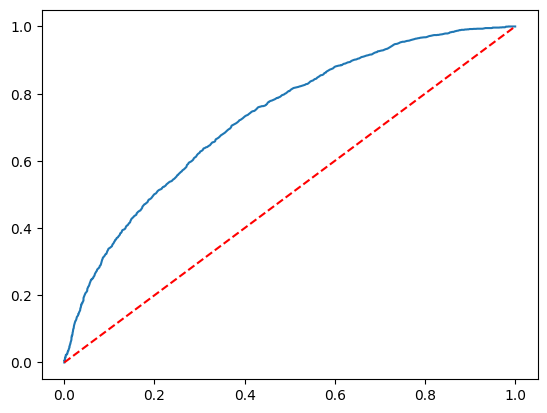

In [ ]:
from sklearn.metrics import roc_auc_score

plt.plot(fpr , tpr )
plt.plot(np.arange(0,1.1,0.1) , np.arange(0,1.1,0.1) , c="red",linestyle="--")
plt.show()